<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/DAV%20-%20Propability%20%26%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, binom, geom

from scipy.stats import ttest_1samp, ttest_ind,ttest_rel

from scipy.stats import chisquare,chi2,chi2_contingency

from scipy.stats import f_oneway,kruskal,shapiro,levene
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import pearsonr,spearmanr

from scipy.stats import poisson

from scipy.stats import expon

from sklearn.impute import SimpleImputer
#!pip install sklearn
from sklearn.preprocessing import LabelEncoder
#!pip install category_encoders
from category_encoders import TargetEncoder

# **DAV - Propability & Statistics**

## Normal Distribution

In [ ]:
# TO calculate Percentile from Z value ( Input Z : -inf to +inf)(output Percentile: 0 ~ 1)
norm.cdf(-1)

0.15865525393145707

In [ ]:
# TO calculate Z value from  Percentile ( Input Percentile : 0 ~ 1)( output Z: -inf to +inf)
norm.ppf(0.9)

1.2815515655446004

In [ ]:
def normal(mu, sigma,obs):
  # Sigma is the Population standard Deviation
  # mu is Pupulation or Sample Mean
  # obs is value for which propability to be calculated
  z = (obs- mu)/sigma
  prob_less = norm.cdf(z)
  prob_more = 1 - prob_less
  return prob_less, prob_more,z

In [ ]:
normal(80,10, 90)

(0.8413447460685429, 0.15865525393145707, 1.0)

In [ ]:
def clt_fun(mu, sigma, n, obs):
  # Sigma is the Population standard Deviation
  # mu is Pupulation or Sample Mean
  # n is sample Size
  # obs is value for which propability to be calculated
  std_error = sigma / np.sqrt(n)
  z = (obs- mu)/std_error
  prob_less = norm.cdf(z)
  prob_more = 1 - prob_less
  return prob_less, prob_more

In [ ]:
clt_fun(80, 15, 50, 75)

(0.009211062727049501, 0.9907889372729505)

In [ ]:
def confiinterval(mu, sigma, n, perct):
  # Sigma is the Population standard Deviation
  # mu is Population or Sample Mean
  # n is sample Size
  # perct is confidence percentatge required for interval calculation
  std_error = sigma / np.sqrt(n)
  x1 = mu + (std_error * norm.ppf((100-perct)/200))
  x2 = mu + (std_error * norm.ppf(1 - ((100-perct)/200)))
  return x1,x2

In [ ]:
confiinterval(80, 10, 30, 99)

(75.29720062054481, 84.70279937945519)

### Population Mean & CI using Centre Limit Theorem

In [ ]:
# This can be used to interpret about population when large sample data is given but not given standard deviation of population
# Function for Finding Confidence Interval(CI) from given sample data - "data" using CLT with sample bin size - "n" , No of sample bins - "m" , Confidence Interval - "perct"
# This Function return tuple of 3 Values - CI lower limit, Mean, CI Upper Limit of given data

# data = sample Dataset(Numerical Series Datatype)
# n = Sample bin size for mean calculation >=30 (int)
# m = No of Sample bins for mean distribution (int)
# perct = Confidence interval Percentage (float)
def Confidence_Interval(data,n,m,perct):
   sample_mean_n = [np.mean(data.sample(n)) for i in range(m)]

   Mean_of_samples_Mean = np.mean(sample_mean_n)
   sd_of_samples_Mean = np.std(sample_mean_n)

   std_error = sd_of_samples_Mean / np.sqrt(n)
   x1 = Mean_of_samples_Mean + (std_error * norm.ppf((100-perct)/200))
   x2 = Mean_of_samples_Mean + (std_error * norm.ppf(1 - ((100-perct)/200)))
   return round(x1),round(Mean_of_samples_Mean),round(x2)

In [ ]:
# This can also be used to interpret about population when large sample data is given but not given standard deviation of population
# this method told during case study review session

# Function for Finding Confidence Interval(CI) from given sample data - "data" using CLT with sample bin size - "n" , No of sample bins - "m" , Confidence Interval - "perct"
# This Function return tuple of 3 Values - CI lower limit, Mean, CI Upper Limit of given data

# data = sample Dataset(Numerical Series Datatype)
# n = Sample bin size for mean calculation >=30 (int)
# m = No of Sample bins for mean distribution (int)
# perct = Confidence interval Percentage (float)
def Confidence_Interval1(data,n,m,perct):
   sample_mean_n = [np.mean(data.sample(n,replace=True)) for i in range(m)]

   Mean_of_samples_Mean = np.mean(sample_mean_n)
   x1 = np.percentile(sample_mean_n,(100-perct)/2)
   x2 = np.percentile(sample_mean_n,100 -(100-perct)/2)

   return round(x1),round(Mean_of_samples_Mean),round(x2)

In [ ]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv")
print("*********************************************************************************")
for z in ['Gender', 'Age', 'Marital_Status', 'City_Category','Stay_In_Current_City_Years']:
  X = []
  U = []
  L = []
  M = []
  print(z,"Attribute Population - Mean & 99% Confidence Interval")
  print("*********************************************************************************")
  for y in data[z].value_counts().index:
    outlierlist=[]
    datai = data[data[z] == y]
    print("-------------------------------------------------------------------")
    print(z,"-", y,"Group")
    print()
    IQR = np.percentile(datai["Purchase"],75) - np.percentile(datai["Purchase"],25)
    lower_limit = max (np.percentile(datai["Purchase"],25) - 1.5*IQR,0)
    upper_limit = np.percentile(datai["Purchase"],75) + 1.5*IQR
    outlierlist = list(np.where( (datai["Purchase"]>upper_limit) | (datai["Purchase"]<lower_limit) )[0])
    datai = datai.reset_index()
    datai.drop(outlierlist,inplace=True)
    Lower_limit,Mean_value,Upper_limit = Confidence_Interval(data= datai["Purchase"],n=100,m=5000,perct=99)
    print("Mean Purchase value :",Mean_value)
    print("99% Confidence Interval :",Lower_limit,"~",Upper_limit )
    X.append(y)
    U.append(Upper_limit)
    M.append(Mean_value)
    L.append(Lower_limit)
  print("-------------------------------------------------------------------")
  plt.figurefigsize=(6,4)
  plt.title("Population Mean & 99% CI Intervals" )
  sns.scatterplot( x= X, y=U)
  sns.scatterplot( x= X, y=M)
  sns.scatterplot( x= X, y=L)
  plt.grid(linestyle = '--', linewidth = 0.5,axis="y")
  plt.show()

### Population Mean & CI using Bootstrapping

Bootstrapping is used when we have very small sample data may be less than 100 sample data points  or where we cannot use Centre limit Theorem

In [ ]:
survey_1 = [35, 36, 33, 37, 34, 35]
survey_2 = [20, 37, 17, 50, 53, 33]

bootstrapped_mean_samples = []
for i in range(10000):
  bootstrapped_samples = np.random.choice(survey_1, size=6)
  bootstrapped_samples_mean = np.mean(bootstrapped_samples)
  bootstrapped_mean_samples.append(bootstrapped_samples_mean)
len(bootstrapped_mean_samples)
#Confidence interval [x1 ~ x2]
x1 = np.percentile(bootstrapped_mean_samples, 2.5)
x2 = np.percentile(bootstrapped_mean_samples, 97.5)
x1, x2

# Population Mean
np.mean(bootstrapped_mean_samples)



35.00555

## Binomial Distribution

In [ ]:
# Binomial Distribution Propability for "s" sucesses in "n" trial with success propability of "p"
n = 10 # No of Trial
p = 0.5 # Propability of Success
s = 5 #No of Success in N trials
binom.pmf(s, n, p)

0.24609375000000003

In [ ]:
# Binomial Distribution Propability for all possible success outcomes from 0 to n Sucesses
n = 10 # No of Trial
p = 0.5 # Propability of Succes
binom.pmf(np.arange(n+1), n, p)

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

<Axes: >

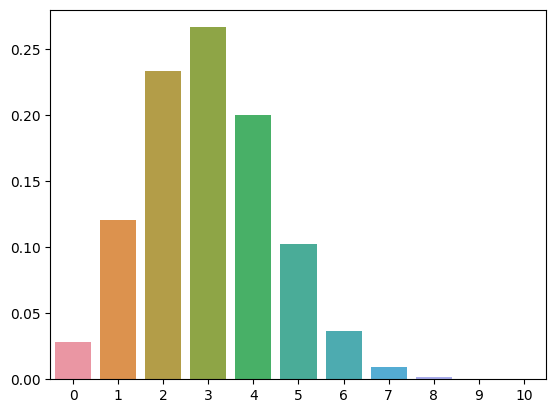

In [ ]:
# Binomial Distribution Propability plot
n = 10 # No of Trial
p = 0.3 # Propability of Succes
sns.barplot(x= np.arange(n+1), y = [binom.pmf(i,n,p) for i in range(n+1)])

In [ ]:
# Binomial Distribution Propability for  sucesses less than "s" in "n" trial with success propability of "p":Cummulative Distribution
n = 10 # No of Trial
p = 0.5 # Propability of Succes
s = 7 # No of Success less than "s"
binom.cdf(s,n,p)

0.9453125

<Axes: >

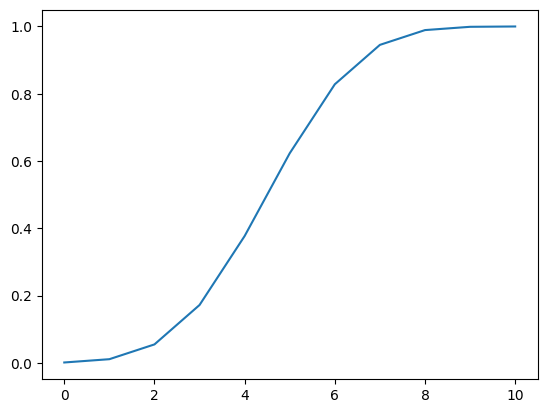

In [ ]:
# Cummulative distribution for Binomial Distribution
n = 10 # No of Trial
p = 0.5 # Propability of Succes
sns.lineplot(x= np.arange(n+1), y = [binom.cdf(i,n,p) for i in range(n+1)])

In [ ]:
# Binomial Distribution Propability given CDF value = q ,  "n" trial with success propability of "p":finding no of success
# Given 94% confidence out of n trial, how many trial will be successful
n = 10 # No of Trial
p = 0.5 # Propability of Succes
q = 0.94 # Percentile
binom.ppf(q=0.94,n=10,p=0.5)

7.0

## Geometric Distribution

In [ ]:
# Geometric Distribution Propability
n = 0 # No of Trial for 1st Succes
p = 0.5 # Propability of Succes
geom.pmf(n, p)

0.0

<Axes: >

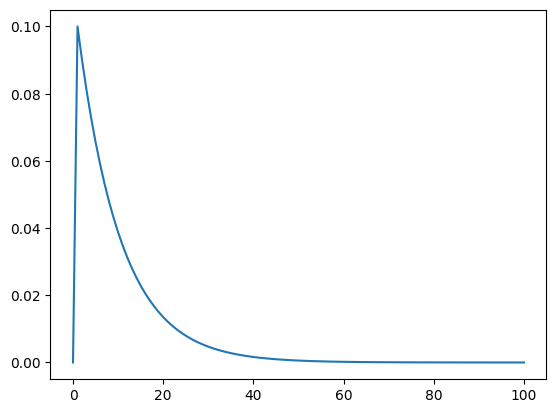

In [ ]:
# Geometric Distribution Propability curve [Propability of Succes at given no of trials]
n = 100 # No of Trial
p = 0.1 # Propability of Succes
sns.lineplot(x= np.arange(0,n+1), y = [geom.pmf(i,p) for i in range(0,n+1)])

In [ ]:
# Geometric Distribution Propability for sucess  by "n"th trial  with success propability of "p" : Cummulative Distribution
n = 3 #  sucesse  by "n"th
p = 0.1 # Propability of Succes
geom.cdf(n, p)

0.271

<Axes: >

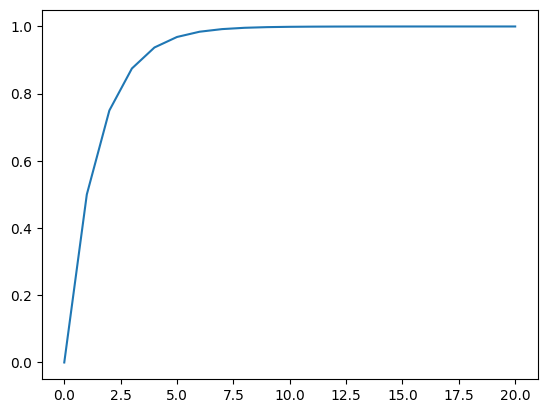

In [ ]:
# Cummulative distribution for Geomtric Distribution
n = 20 # No of Trial
p = 0.5 # Propability of Success
sns.lineplot(x= np.arange(0,n+1), y = [geom.cdf(i,p) for i in range(0,n+1)])

In [ ]:
# Geometric Distribution Propability given CDF value = q , with success propability of "p":finding n no of trials
# with 95% confidence how many trial willbe needed for the first success
p = 0.5 # Propability of Succes
q = 0.95 # Percentile for
geom.ppf(q=0.95,p=0.5)

5.0

In [ ]:
geom.ppf?

# **DAV - Fundamentals**

## Z-Test

In [ ]:
# H0: mu = 500
# Ha : mu >500

z_stat = (530-500)/(125/np.sqrt(70))
p_value = 1-norm.cdf(z_stat)
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
else:
    print("Do not reject H0")

In [ ]:
z = norm.ppf(0.95)
x = 500 + z * 125/np.sqrt(70)
x

In [ ]:
1-norm.cdf((524.574701413748-500)/(125/np.sqrt(70)))

## T-Test

### 1-Sample T-Test

In [ ]:
# Improve IQ with a pill
#Population IQ average = 100
#One researcher claims that his pill will improve IQ

iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]
np.mean(iq_scores)

103.5

In [ ]:
alpha = 0.01
#H0 : mu = 100 (pill does have any effect)
#Ha : mu> 100 (pill has a good effect)

t_stat, p_value = ttest_1samp(iq_scores, 100,alternative = "greater")
# meaning iq_scores mean greater than 100 similarily less than and two tailed meaning not equal to in alternativa
print(p_value)
print(t_stat)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("Pill has no effect")

0.08774972467925055
1.5071573172061195
Fail to reject H0
Pill has no effect


### 2-Sample or Independent T-Test

First Need to check if both Data Sets have same Variance .... This can be done using levene test or by looking into both datasets Std Dev values in "describe() function"

In [ ]:
#IQ across 2 schools
df_iq = pd.read_csv("iq_two_schools.csv")
df_iq.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [ ]:
df_iq.groupby("School")["iq"].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

In [ ]:
iq_1 = df_iq[df_iq["School"]=="school_1"]["iq"]
iq_2 = df_iq[df_iq["School"]=="school_2"]["iq"]

In [ ]:
# H0: mu1 = mu2 #H0 : two schools are essentially the same
#Ha: mu1 != mu2  #Default - two sided
t_stat, p_value = ttest_ind(iq_1, iq_2)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.02004552710936217
Reject H0


In [ ]:
#H0: mu1 >= mu2
#Ha : mu1 < mu2

t_stat, p_value = ttest_ind(iq_1, iq_2, alternative="less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.010022763554681085
Reject H0


In [ ]:
#H0: mu1 <= mu2
#Ha : mu1 > mu2

t_stat, p_value = ttest_ind(iq_1, iq_2, alternative="greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.9899772364453189
Fail to reject H0


### Two Related Sample / Dependent / Paired T-test

In [ ]:
# Before & After data collected from same person/point

The Zumba trainer claims that the new dance routine helps to reduce more weight of the customers. The weights of 8 people are recorded for before the Zumba training and after the Zumba training for a month.

Test the trainer's claim with 90% confidence

In [ ]:
wt_before=[85, 74, 63.5, 69.4, 71.6, 65,90,78]

wt_after=[82, 71, 64, 65.2, 67.8, 64.7,95,77]

#H0: mu1 = mu2
#Ha : mu1 < mu2 or mu1 > mu2 or mu1 != mu2

t_stat, p_value = ttest_rel(wt_after,wt_before,alternative = "less")
print(p_value)
if p_value < 0.1:
    print("Reject H0")
    print("There is a effect on before & after results")
else :
  print("Accept Ho")
  print("No effect , before & after are same")

0.14546808501326386
Accept Ho
No effect , before & after are same


Will problem solving sessions help students?

Test 1: Before the session

Test 2: After the session

In [ ]:
df_ps = pd.read_csv("problem_solving.csv")

In [ ]:
df_ps.head()

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43


In [ ]:
#H0 : Problem solving has no effect
#Ha : Problem solving has an effect

t_stat, p_value= ttest_rel(df_ps["test_1"] , df_ps["test_2"])
print(p_value)
if p_value < 0.1:
    print("Reject H0")
    print("There is a effect on before & after results")
else :
  print("Accept Ho")
  print("No effect , before & after are same")

1.795840353792313e-07
Reject H0
There is a effect on before & after results


In [ ]:
#H0 : Problem solving has no effect (>=)
#Ha : Problem solving improved the scores (<)

t_stat, p_value= ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative="less")
print(p_value)
if p_value < 0.1:
    print("Reject H0")
    print("Problem solving improved the scores")
else :
  print("Accept Ho")
  print("Problem solving has no effect")

8.979201768961566e-08
Reject H0
Problem solving improved the scores


In [ ]:
# H0 : Problem solving has no effect (<=)
# Ha: Problem solving deteriorated the scores (>)

t_stat, p_value = ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative="greater")
print(p_value)
if p_value < 0.1:
    print("Reject H0")
    print("# Ha: Problem solving deteriorated the scores ")
else :
  print("Accept Ho")
  print("Problem solving has no effect")

0.9999999102079823
Accept Ho
Problem solving has no effect


In [ ]:
len(df_ps)

137

In [ ]:
# Notice df ( Degrees of Freedom ) in the output - we need 136 other values to fill rest of the data in the table
ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative="greater")

TtestResult(statistic=-5.502886353508166, pvalue=0.9999999102079823, df=136)

## Chisquared Test

### fit the Expected Distribution

In [ ]:
#Coin toss
#Checking to see if categories fit the Expected Distribution like a fair coin having 50% Head and 50% Tails

#H0 : Coin is fair
#Ha : Coin is biased
#Chisquared(Actual Values, Expected Values as per Ho)
alpha = 0.05
chi_stat, p_value = chisquare(
    [28, 22],
    [25, 25],
)
print(p_value)
print(chi_stat)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("Coin is fair")

0.3961439091520741
0.72
Fail to reject H0
Coin is fair


In [ ]:
#chi-stat manually doing
(28 - 25)**2/25 + (22 - 25)**2 /25

0.72

In [ ]:
#p-value manually doing
# 1 - chi2.cdf(chi-stat, df=1)
1 - chi2.cdf(0.72, df=1)

0.3961439091520741

In [ ]:
#finding 95% Critical Chistat Value
chi2.ppf(0.95, df=1)

3.841458820694124

### Independence between categories

In [ ]:
#Gender vs offline and online
# Testing for Independence between categories like if Gender has effect on Online/Offline Buying

# H0: Gender and preference are independent
# Ha: Preference depends on gender

observed = [
    [527, 72],
    [206, 102],
]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed)
print(chi_stat)
print(p_value)
print(df)
print(exp_freq)
if p_value < 0.05:
    print("Reject H0")

57.04098674049609
4.268230756875865e-14
1
[[484.08710033 114.91289967]
 [248.91289967  59.08710033]]
Reject H0


## ANOVA

In [ ]:
from scipy.stats import f_oneway

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

f_stats, p_value = f_oneway(income_kp281, income_kp481, income_kp781)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

### Kruskal Wallis

In [ ]:
from scipy.stats import kruskal

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(weather1,weather2,weather3,weather4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("All groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(weather1,weather2,weather3,weather4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

### QQplots

To get intuition if data is Normal Distribution

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(height, line="s")
plt.show()

### Shapiro

To statistically check if given data is Gaussian Distribution

In [ ]:
from scipy.stats import shapiro

In [ ]:
#H0 : Data is Gaussian
#Ha : Data is not Gaussian

test_stat, p_value = shapiro(height_subset)
if p_value < 0.05:
    print("Reject H0")
    print("Data is Not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

### Levene Test

To check if data sets have same Variance

In [ ]:
from scipy.stats import levene

* levene(data1,data2,centre = "mean") --> when distribution Normal or moderately skewed
* levene(data1,data2,centre = "median") --> when distribution skewed
* levene(data1,data2,centre = "trimmed") --> when distribution is heavy tailed

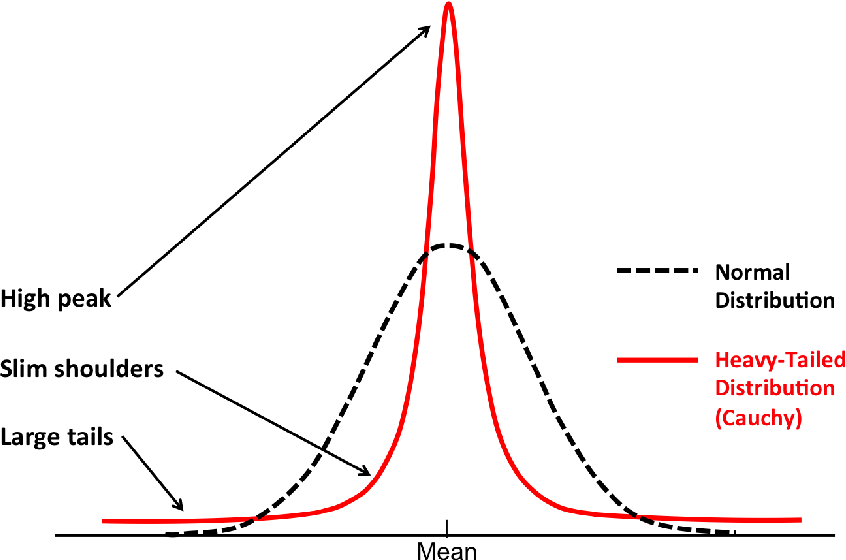

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(height_men, height_women)
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

## Correlation test

### Linear Relation data

In [ ]:
df_hw = pd.read_csv("weight-height.csv")

<Axes: xlabel='Height', ylabel='Weight'>

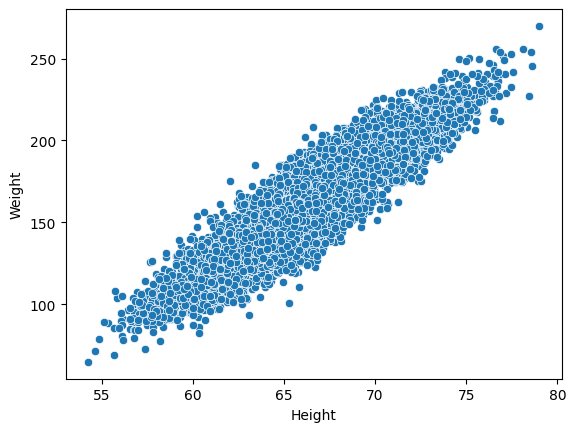

In [ ]:
sns.scatterplot(x=df_hw["Height"], y=df_hw["Weight"])

In [ ]:
df_hw[["Height", "Weight"]].corr() #pearson corr coeff

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [ ]:
np.corrcoef(df_hw["Height"], df_hw["Weight"]) #pearson corr coeff

array([[1.       , 0.9247563],
       [0.9247563, 1.       ]])

In [ ]:
# H0: No correlation
# Ha: There is correlation

pearson_coeff, p_value = pearsonr(df_hw["Height"], df_hw["Weight"])

# pearson works only if data is linear....so plot XY scatter before applying any correlation test
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

Reject H0


### Non Linear Realtion Data

Detect nonlinear data correlation as long as data is monotonous meaning x-increase then y-increase lly x-decrease then y-decrease

In [ ]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(df_hw["Height"], df_hw["Weight"])

#spearman detect nonlinear as data is monotonin meaning x-increase then y-increase lly x-decrease then y-decrease
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

Reject H0


## Poisson Distribution

In [ ]:
#Accident
#A city sees 3 accidents per day on average., what is the propability that there will be eactly 5 Accidents
# k = No of Events = 5
# mu = lambda = Expected occurence rate = 3
poisson.pmf(k=5, mu=3)

0.10081881344492458

In [ ]:
#Accident
#A city sees 3 accidents per day on average., what is the propability that there will be eactly 5 or fewer accidents tomorrow
# k = No of Events = 5
# mu = lambda = Expected occurence rate = 3
poisson.cdf(k=5, mu=3)

0.9160820579686966

In [ ]:
# Rechecking Function of CDF & PMF
# [poisson.pmf(k=0, mu=3) + poisson.pmf(k=1, mu=3) + poisson.pmf(k=2, mu=3) + poisson.pmf(k=3, mu=3) + poisson.pmf(k=4, mu=3)] == [poisson.cdf(k= 4, mu=3)]

In [ ]:
poisson.pmf(k=0, mu=3) + poisson.pmf(k=1, mu=3) + poisson.pmf(k=2, mu=3) + poisson.pmf(k=3, mu=3) + poisson.pmf(k=4, mu=3)

0.8152632445237721

In [ ]:
poisson.cdf(k=4, mu=3)

0.8152632445237722

In [ ]:
# A shop is open for 8 hours. The average number of customers is 74 - assume Poisson distributed.

# What is the probability that in 2 hours, there will be at most 15 customers

# mu = 74/8*2 = 18.5
poisson.cdf(k=15, mu=18.5)

0.24902769151284776

In [ ]:
# A shop is open for 8 hours. The average number of customers is 74 - assume Poisson distributed.

# What is the probability that in 2 hours, there will be atleast 7 Customers

# mu = 74/8*2 = 18.5

# P[x >=7] = 1 - P[x<=6] #discrete
# P[x >=7] = 1 - P[x<7] #continous

# Poisson is discrete Distribution like binom, geom where as norm is continuous,so

1- poisson.cdf(k=6 , mu=18.5)

0.9992622541111789

In [ ]:
# There are 80 students in a kinder garden class. Each one of them has 0.015 probability of forgetting their lunch on any given day.

# What is the average or expected number of students who forgot lunch in the class?

80*0.015 #rate = 1.2

# What is the propability that 3 Students will forget their lunch

poisson.pmf(k=3,mu=1.2)

0.08674393303071422

In [ ]:
# when Large n, small p, np=mu or lambda,
# then Binom distribution approximately equal to Poisson distribution

binom.pmf(k=3, n=80, p=0.015)

0.08660120920447566

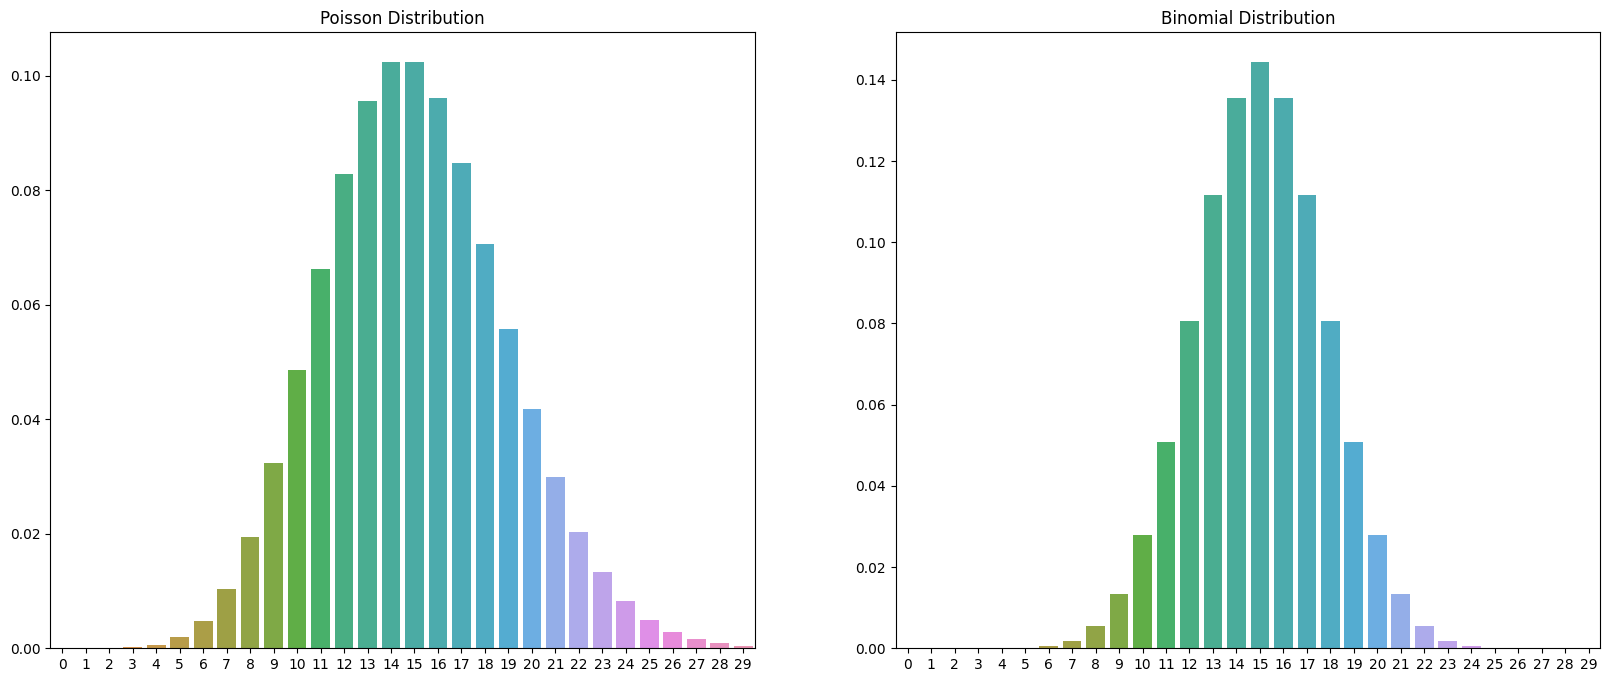

In [ ]:
#Comparison of Poisson & Binom Distribution with p= 0.5,n=30

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
mu = 15
x_values = np.arange(0, 30)
y_values = poisson.pmf(x_values, mu=mu)
sns.barplot(x=x_values, y=y_values)
plt.title("Poisson Distribution")

plt.subplot(1,2,2)
p = 0.5
x_values = np.arange(0, 30)
y_values = binom.pmf(x_values, n=30,p=0.5)
sns.barplot(x=x_values, y=y_values)
plt.title("Binomial Distribution")

plt.show()

<Axes: >

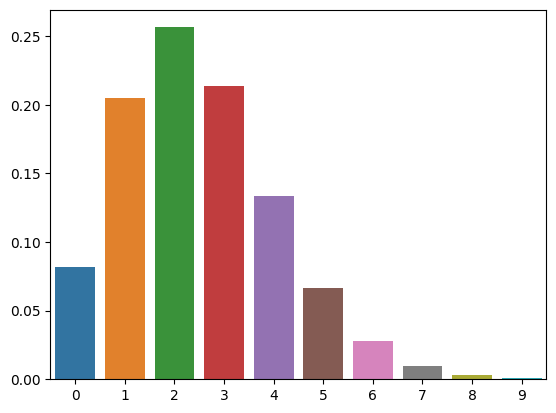

In [ ]:
#Poisson distribution - Football

mu = 2.5
x_values = np.arange(0, 10)
y_values = poisson.pmf(x_values, mu=mu)
sns.barplot(x=x_values, y=y_values)

<Axes: >

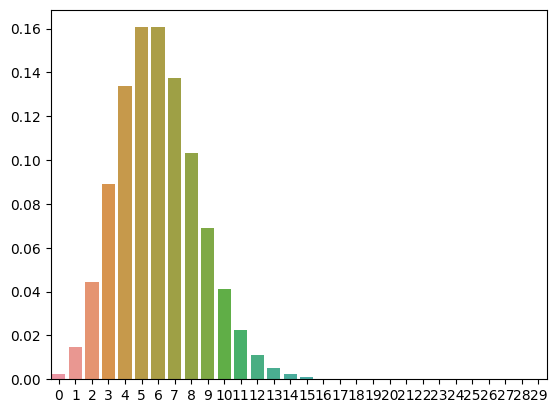

In [ ]:
mu = 6
x_values = np.arange(0, 30)
y_values = poisson.pmf(x_values, mu=mu)
sns.barplot(x=x_values, y=y_values)

0.02% of credit card holders of a company report theft of their credit cards each month. The company has a total of 15,000 credit cards.

In [ ]:
# Determine the expected number of reported stolen credit cards in a month.
# 0.02%*15000
0.02/100 * 15000

3.0

In [ ]:
# What is the probability that no one reports theft of credit cards during the next month
poisson.pmf(k=0,mu=3)

0.049787068367863944

In [ ]:
# What is the probability that no of thefts <= 3   credit cards during the next month
poisson.cdf(k=3,mu=3)

0.6472318887822313

In [ ]:
# With 99% confidence how many cards might be lost in next month
poisson.ppf(q=0.99,mu=3)

8.0

<Axes: >

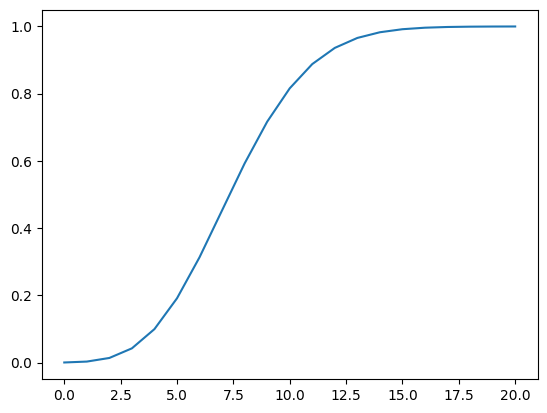

In [ ]:
# Cummulative distribution for Poisson Distribution
n = 20 # no of events
p = 8 # rate : lambda/mu
sns.lineplot(x= np.arange(0,n+1), y = [poisson.cdf(k=i,mu=p) for i in range(0,n+1)])

## Exponential Distribution

In [ ]:
# lambda = 240 msgs in 1 hr --> 240/3600 msgs/sec -- >> 1/15

#find the propoability that there will be "0" msg in next 10 seconds

# for 10 sec --> mu or lamba = 10 * 240/3600 msg
poisson.pmf(k=0,mu=10*240/3600)

0.513417119032592

In [ ]:
# What is the propability that next msg will after 10 sec (t> 10)
# p[T>10] = 1- p[T<=10]
# scale = Amount of time for one event [ 240/3600 msgs/sec --> 15 sec for 1 msg ]
# x is the time
# Scale(time units for 1 event) = 1/lambda(no of event per one time unit)
1-expon.cdf(x=10,scale = 15)

0.513417119032592

In [ ]:
# With 99% confidence,after how much time will be taken for next msg
expon.ppf(q=0.99,scale=15)

69.07755278982137

In [ ]:
# For a certain railway agency, the number of days people book their rail ticket in advance can be modeled by an exponential distribution, with the average amount of time to be 4 days.
# Based on this data, how many days in advance do 75% of all travelers book tickets
expon.ppf(q=0.75,scale=4)

5.545177444479562

### Memoryless Property

In [ ]:
# Propability that next event occurs after 9 time units/ given no event occured in first 3 time units
(1-expon.cdf(x=9,scale=5))/(1-expon.cdf(x=3,scale=5))

0.30119421191220214

In [ ]:
# Propability that next event occurs after 6 time units
(1-expon.cdf(x=6,scale=5))

0.3011942119122022

In [ ]:
#propability of Zero events in 9 times units given No event in first 3 time units
poisson.pmf(k=0,mu=9*1/5)/poisson.pmf(k=0,mu=3*1/5)

0.3011942119122021

<Axes: >

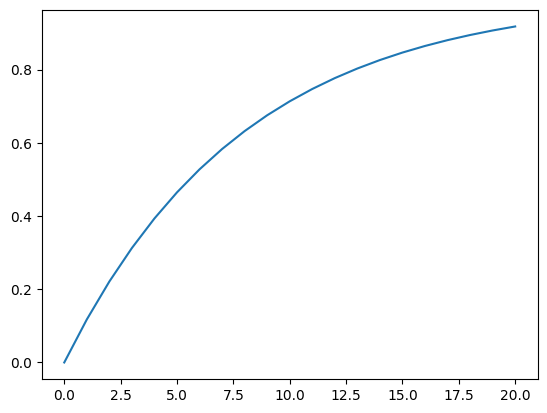

In [ ]:
# Cummulative distribution for Exponential Distribution
n = 20 # amount of time
p = 8 # scale
sns.lineplot(x= np.arange(0,n+1), y = [expon.cdf(x=i,scale=p) for i in range(0,n+1)])

# **DAV - Python Libraries**

In [ ]:
from sklearn.impute import SimpleImputer

## SimpleImputer

To fill NaN Values

* For Numerical Missing --> Impute with Median [ median_imputer= SimpleImputer(strategy = 'median')]
* For Categorical Missing --> Impute with Mode [freq_imputer = SimpleImputer(strategy = 'most_frequent') ]

In [ ]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
a

,0
0,10.0
1,10.0
2,20.0
3,10.0
4,30.0
5,10.0
6,NaN
7,50.0


In [ ]:
SimpleImputer(strategy="mean").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

In [ ]:
SimpleImputer(strategy="constant",fill_value=1000).fit_transform(a)

array([[  10.],
       [  10.],
       [  20.],
       [  10.],
       [  30.],
       [  10.],
       [1000.],
       [  50.]])

## LabelEncoder

It is used when we have only 2 groups [y or N / True or False] in categorical attribute & when we want to change them to Numerical : 0 or 1, we use LabelEncoder

In [ ]:
#!pip install sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()
data[col]=label_encoder.fit_transform(data[col])

## TargetEncoder

It is used when we have only > 2 groups [y or N / True or False] in categorical attribute & when we want to change them to Numerical we use TargetEncoder ...it replace cateogircal value with conditional propability values : P[Targetfeaturecolumn | Cateorigal group]

In [ ]:
# !pip install category_encoders
from category_encoders import TargetEncoder

In [ ]:
col="Property_Area"
te=TargetEncoder()
data[col]=te.fit_transform(data[col],data["Loan_Status"])
data[col].value_counts()